In [2]:
# libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("health_insurance.csv")
df

,age,gender,bmi,bp,children,region,smoker,medical_cost
0,23,M,31.900,157,0,southwest,smoker,16884.92400
1,20,F,36.770,160,1,southeast,non-smoker,1725.55230
2,33,F,35.000,145,3,southeast,non-smoker,4449.46200
3,37,F,23.705,153,0,northwest,non-smoker,21984.47061
4,36,F,27.880,156,0,northwest,non-smoker,3866.85520
...,...,...,...,...,...,...,...,...
1295,54,F,30.970,143,3,southwest,non-smoker,10600.54830
1296,22,M,34.920,156,0,northeast,non-smoker,2205.98080
1297,21,M,34.850,145,0,southeast,non-smoker,1629.83350
1298,22,M,24.800,150,0,northwest,non-smoker,2007.94500


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           1300 non-null   int64  
 1   gender        1300 non-null   object 
 2   bmi           1300 non-null   float64
 3   bp            1300 non-null   int64  
 4   children      1300 non-null   int64  
 5   region        1300 non-null   object 
 6   smoker        1300 non-null   object 
 7   medical_cost  1300 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 81.4+ KB


In [5]:
df.columns

Index(['age', 'gender', 'bmi', 'bp ', 'children', 'region', 'smoker',
       'medical_cost'],
      dtype='object')

In [6]:
df.isna().max()

age             False
gender          False
bmi             False
bp              False
children        False
region          False
smoker          False
medical_cost    False
dtype: bool

In [7]:
df.duplicated().sum()

0

In [8]:
df.drop_duplicates(inplace = True)
df

,age,gender,bmi,bp,children,region,smoker,medical_cost
0,23,M,31.900,157,0,southwest,smoker,16884.92400
1,20,F,36.770,160,1,southeast,non-smoker,1725.55230
2,33,F,35.000,145,3,southeast,non-smoker,4449.46200
3,37,F,23.705,153,0,northwest,non-smoker,21984.47061
4,36,F,27.880,156,0,northwest,non-smoker,3866.85520
...,...,...,...,...,...,...,...,...
1295,54,F,30.970,143,3,southwest,non-smoker,10600.54830
1296,22,M,34.920,156,0,northeast,non-smoker,2205.98080
1297,21,M,34.850,145,0,southeast,non-smoker,1629.83350
1298,22,M,24.800,150,0,northwest,non-smoker,2007.94500


In [9]:
print('Shape',df.shape)
print('Rows:',df.shape[0])
print("Columns:",df.shape[1])

Shape (1300, 8)
Rows: 1300
Columns: 8


In [10]:
df.describe()

,age,bmi,bp,children,medical_cost
count,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000
mean,42.280769,31.581396,147.774615,1.104615,13243.214691
std,14.024847,6.356487,11.221987,1.208697,12060.371167
min,19.000000,15.290000,120.000000,0.000000,1121.873900
25%,29.750000,27.207500,140.000000,0.000000,4760.155950
50%,42.000000,31.645000,150.000000,1.000000,9388.753650
75%,54.000000,35.488750,156.000000,2.000000,16579.959053
max,69.000000,57.130000,178.000000,5.000000,63770.428010


<Axes: xlabel='age', ylabel='Count'>

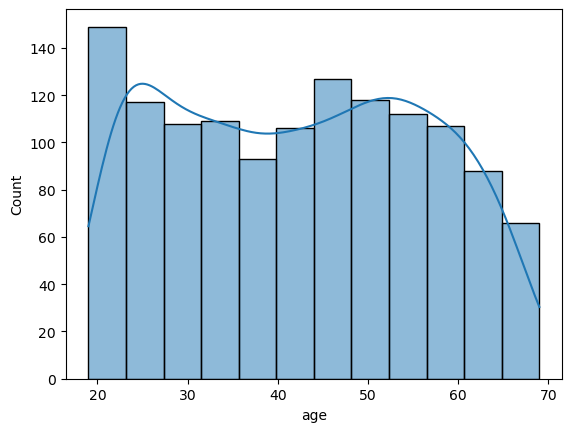

In [11]:
sns.histplot(df['age'],kde = True)

In [12]:
df['medical_cost'].unique

<bound method Series.unique of 0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1295    10600.54830
1296     2205.98080
1297     1629.83350
1298     2007.94500
1299    29141.36030
Name: medical_cost, Length: 1300, dtype: float64>

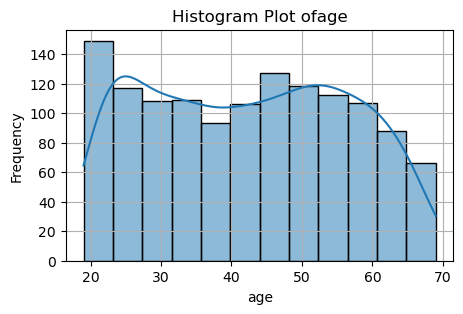

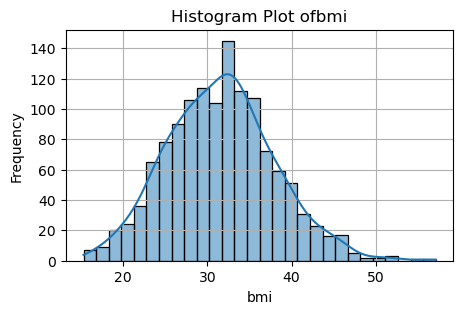

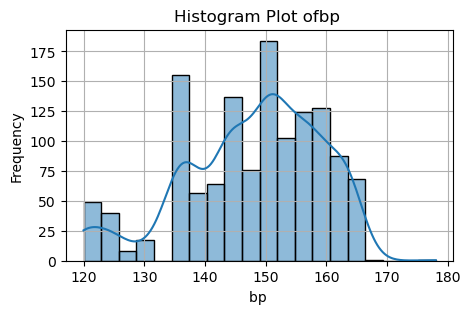

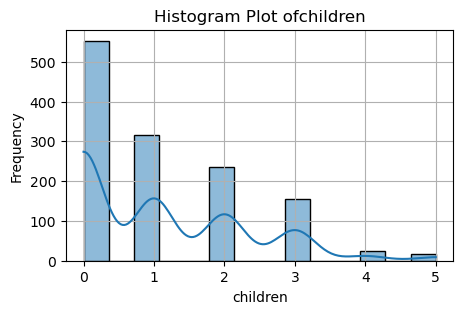

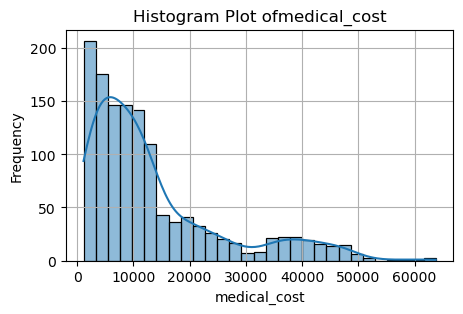

In [13]:
for col in df.select_dtypes(include = np.number):
    plt.figure(figsize = (5, 3))
    sns.histplot(df[col],kde = True)
    plt.title(f"Histogram Plot of{col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid()
    plt.show

##### Histogram
##### The frequency of distribution of data each bins showing by a histogram



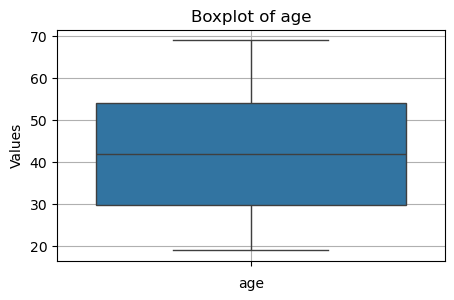

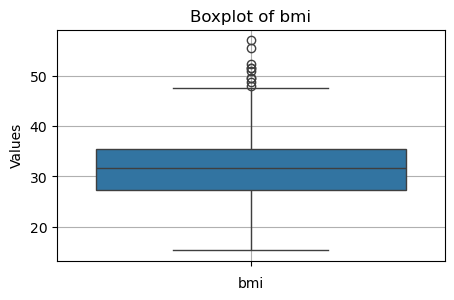

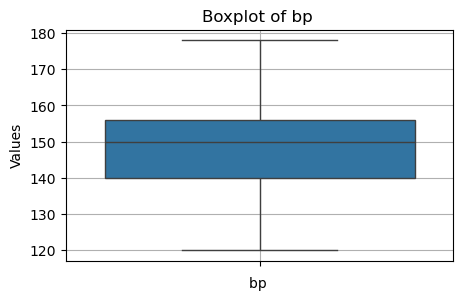

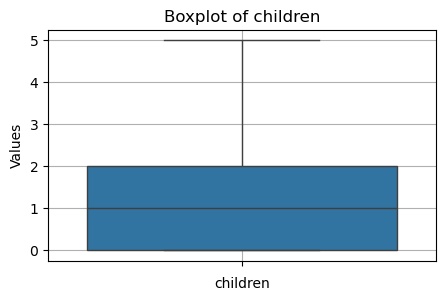

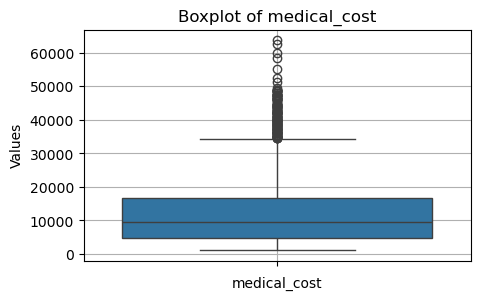

In [14]:
for col in df.select_dtypes(include = np.number):
    plt.figure(figsize = (5,3))
    sns.boxplot(df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.ylabel("Values")
    plt.grid()
    plt.show()

##### Boxplot 
##### Boxplot shows outlier and to represent data districution.

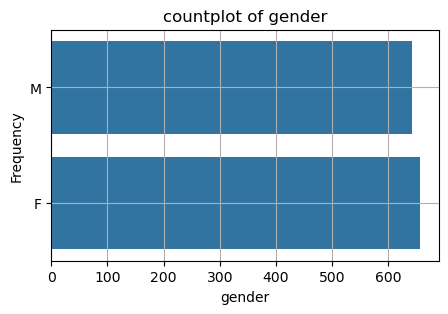

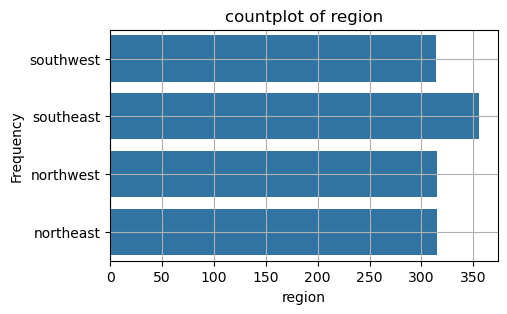

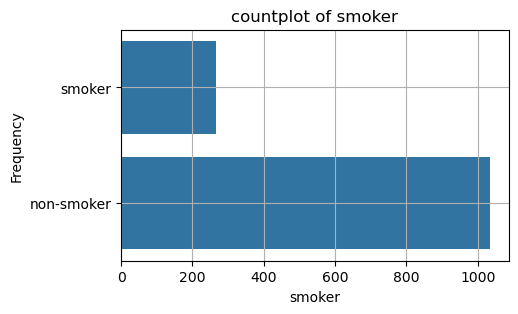

In [15]:
for col in df.select_dtypes(exclude = np.number):
    plt.figure(figsize = (5,3))
    sns.countplot(df[col])
   # plt.countplot(df[col])
    plt.title(f"countplot of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid()
    plt.show()

In [16]:
#dealing with categorical values
# label encoding 
# male = 1,female=0
df.loc[df['gender'] == 'F','gender'] = 0
df.loc[df['gender'] == 'M','gender'] = 1

df.loc[df['smoker'] == 'smoker','smoker'] = 1
df.loc[df['smoker'] == 'non-smoker','smoker'] = 0
df

,age,gender,bmi,bp,children,region,smoker,medical_cost
0,23,1,31.900,157,0,southwest,1,16884.92400
1,20,0,36.770,160,1,southeast,0,1725.55230
2,33,0,35.000,145,3,southeast,0,4449.46200
3,37,0,23.705,153,0,northwest,0,21984.47061
4,36,0,27.880,156,0,northwest,0,3866.85520
...,...,...,...,...,...,...,...,...
1295,54,0,30.970,143,3,southwest,0,10600.54830
1296,22,1,34.920,156,0,northeast,0,2205.98080
1297,21,1,34.850,145,0,southeast,0,1629.83350
1298,22,1,24.800,150,0,northwest,0,2007.94500


In [17]:
df = pd.get_dummies(df, columns = ['region'])
df

,age,gender,bmi,bp,children,smoker,medical_cost,region_northeast,region_northwest,region_southeast,region_southwest
0,23,1,31.900,157,0,1,16884.92400,False,False,False,True
1,20,0,36.770,160,1,0,1725.55230,False,False,True,False
2,33,0,35.000,145,3,0,4449.46200,False,False,True,False
3,37,0,23.705,153,0,0,21984.47061,False,True,False,False
4,36,0,27.880,156,0,0,3866.85520,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1295,54,0,30.970,143,3,0,10600.54830,False,False,False,True
1296,22,1,34.920,156,0,0,2205.98080,True,False,False,False
1297,21,1,34.850,145,0,0,1629.83350,False,False,True,False
1298,22,1,24.800,150,0,0,2007.94500,False,True,False,False


In [20]:
df.replace({False:0,True:1},inplace = True)
df.head(10)

,age,gender,bmi,bp,children,smoker,medical_cost,region_northeast,region_northwest,region_southeast,region_southwest
0,23,1,31.900,157,0,1,16884.92400,0,0,0,1
1,20,0,36.770,160,1,0,1725.55230,0,0,1,0
2,33,0,35.000,145,3,0,4449.46200,0,0,1,0
3,37,0,23.705,153,0,0,21984.47061,0,1,0,0
4,36,0,27.880,156,0,0,3866.85520,0,1,0,0
5,33,1,25.740,152,0,0,3756.62160,0,0,1,0
6,48,1,31.440,150,1,0,8240.58960,0,0,1,0
7,26,0,21.845,140,0,0,2395.17155,0,1,0,0
8,36,1,31.920,137,1,1,37701.87680,1,0,0,0
9,60,1,27.720,142,3,0,14001.13380,0,1,0,0


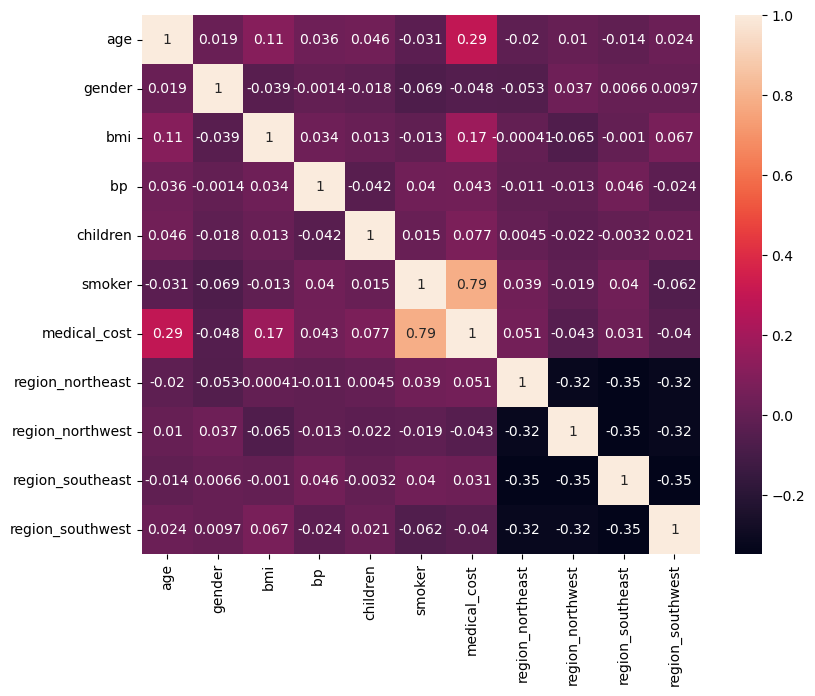

In [62]:
plt.figure(figsize = (9,7))
sns.heatmap(df.corr(),annot=True)
plt.show()

### Heatmap 
####  shows a correlation 

In [55]:
X = df[['smoker']]
y = df[['medical_cost']]

from sklearn.model_selection import train_test_split
X_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state =42)


In [56]:
from sklearn.linear_model import LinearRegression 
linear_model = LinearRegression()
linear_model.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [60]:
y_train_pred = linear_model.predict(X_train)
# y_test_pred = linear_model.predict(X_test)


In [59]:
from sklearn.metrics import r2_score 
print("Training R2 Score:",np.round(r2_score(y_train,y_train_pred)))
#print("Testing R2 Score:",np.round(r2_score(y_test,y_test_pred)))

Training R2 Score: 1.0


In [49]:
# multiple regression 
X = df[["age","bmi","smoker"]]
y = df[['medical_cost']]

from sklearn.model_selection import train_test_split 
X_train ,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2,random_state=42)

In [52]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [53]:
y_train_pred = linear_model.predict(X_train)
y_test_pred = linear_model.predict(X_test)

In [54]:
from sklearn.metrics import r2_score 
print("Training R2 score:",np.round(r2_score(y_train,y_train_pred)))
print("Testing R2 score:",np.round(r2_score(y_test,y_test_pred)))

Training R2 score: 1.0
Testing R2 score: 1.0
